# Spatiotemporal Location Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

In [2]:
preprocessed_data = pd.read_csv('spatiotemporal_data_preprocessed.csv')
display(preprocessed_data)

,Unnamed: 0,start_station_latitude,start_station_longitude,date,trip_count,3,4,5,6,7,...,April,May,June,July,August,September,October,November,December,days_passed
0,0,37.871719,-122.273068,2018-01-01,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,37.783757,-122.222603,2018-01-01,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,37.757369,-122.392057,2018-01-01,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,37.337246,-121.883074,2018-01-01,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,37.775880,-122.393170,2018-01-01,21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148840,150270,37.773793,-122.421239,2019-05-31,25,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,515
148841,150271,37.773717,-122.411647,2019-05-31,27,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,515
148842,150272,37.773507,-122.416040,2019-05-31,50,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,515
148843,150273,37.777547,-122.433274,2019-05-31,25,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,515


## Housing Data

In [23]:
housing_data = pd.read_csv('housing.csv') # https://www.kaggle.com/camnugent/california-housing-prices
display(housing_data)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


<AxesSubplot:>

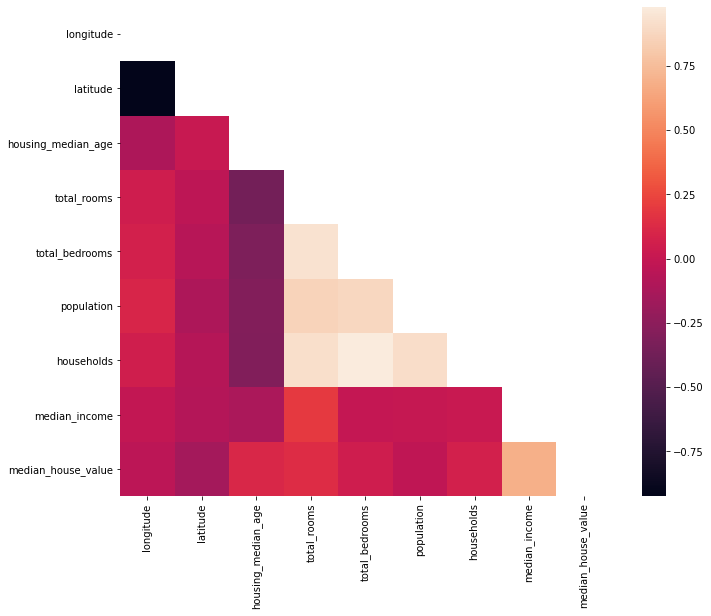

In [24]:
corr = housing_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask = mask)

In [25]:
housing_data.drop(columns=['total_bedrooms', 'households', 'total_rooms','ocean_proximity'], inplace = True)

display(housing_data)

,longitude,latitude,housing_median_age,population,median_income,median_house_value
0,-122.23,37.88,41.0,322.0,8.3252,452600.0
1,-122.22,37.86,21.0,2401.0,8.3014,358500.0
2,-122.24,37.85,52.0,496.0,7.2574,352100.0
3,-122.25,37.85,52.0,558.0,5.6431,341300.0
4,-122.25,37.85,52.0,565.0,3.8462,342200.0
...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,845.0,1.5603,78100.0
20636,-121.21,39.49,18.0,356.0,2.5568,77100.0
20637,-121.22,39.43,17.0,1007.0,1.7000,92300.0
20638,-121.32,39.43,18.0,741.0,1.8672,84700.0


## Synthesis

In [26]:
# WARNING: PAINFULLY SLOW!
from tqdm import tqdm

# Compile housing data by finding closest housing data point for each station location.
location_to_housing_data = dict()

unique_locations = preprocessed_data.groupby(['start_station_latitude','start_station_longitude']).size().reset_index()

for i, row in tqdm(unique_locations.iterrows()):
    lat = row['start_station_latitude']
    long = row['start_station_longitude']
    
    min_dist = float('inf')
    min_hdata = []
    
    for j, hrow in housing_data.iterrows():
        hlat = hrow['latitude']
        hlong = hrow['longitude']
        dist = np.linalg.norm(np.array([lat,long]) - np.array([hlat,hlong]))
        if dist < min_dist:
            min_dist = dist
            min_hdata = list(hrow)
    
    location_to_housing_data[(lat,long)] = min_hdata

408it [11:29,  1.69s/it]


In [27]:
def get_median_age(row):
    lat = row['start_station_latitude']
    long = row['start_station_longitude']
    return location_to_housing_data[(lat,long)][2]

def get_population(row):
    lat = row['start_station_latitude']
    long = row['start_station_longitude']
    return location_to_housing_data[(lat,long)][3]

def get_median_income(row):
    lat = row['start_station_latitude']
    long = row['start_station_longitude']
    return location_to_housing_data[(lat,long)][4]

def get_median_house_value(row):
    lat = row['start_station_latitude']
    long = row['start_station_longitude']
    return location_to_housing_data[(lat,long)][5]

preprocessed_data['housing_median_age'] = preprocessed_data.apply(get_median_age, axis=1)
preprocessed_data['population'] = preprocessed_data.apply(get_population, axis=1)
preprocessed_data['median_income'] = preprocessed_data.apply(get_median_income, axis=1)
preprocessed_data['median_house_value'] = preprocessed_data.apply(get_median_house_value, axis=1)

In [28]:
display(preprocessed_data)

,Unnamed: 0,start_station_latitude,start_station_longitude,date,trip_count,3,4,5,6,7,...,August,September,October,November,December,days_passed,housing_median_age,population,median_income,median_house_value
0,0,37.871719,-122.273068,2018-01-01,3,0,0,0,0,0,...,0,0,0,0,0,0,30.0,862.0,1.7778,268800.0
1,1,37.783757,-122.222603,2018-01-01,1,0,0,0,0,0,...,0,0,0,0,0,0,50.0,1525.0,1.4886,128800.0
2,2,37.757369,-122.392057,2018-01-01,9,0,0,0,0,0,...,0,0,0,0,0,0,52.0,410.0,4.0042,208300.0
3,3,37.337246,-121.883074,2018-01-01,1,0,0,0,0,0,...,0,0,0,0,0,0,40.0,1493.0,1.2887,212500.0
4,4,37.775880,-122.393170,2018-01-01,21,0,0,0,0,0,...,0,0,0,0,0,0,3.0,1441.0,4.7105,275000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148840,150270,37.773793,-122.421239,2019-05-31,25,0,0,0,0,0,...,0,0,0,0,0,515,52.0,589.0,2.5186,250000.0
148841,150271,37.773717,-122.411647,2019-05-31,27,0,0,0,0,0,...,0,0,0,0,0,515,52.0,168.0,3.2292,275000.0
148842,150272,37.773507,-122.416040,2019-05-31,50,0,0,0,0,0,...,0,0,0,0,0,515,52.0,589.0,2.5186,250000.0
148843,150273,37.777547,-122.433274,2019-05-31,25,0,0,0,0,0,...,0,0,0,0,0,515,10.0,1245.0,1.3062,220000.0


In [29]:
preprocessed_data.to_csv('spatiotemporal_data_with_census_preprocessed.csv')